<a href="https://colab.research.google.com/github/yajima-yasutoshi/DataScience/blob/main/20241206/%E5%9F%BA%E7%A4%8E%E9%9B%86%E8%A8%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 基礎集計

## 資料保管場所

20241206

https://github.com/yajima-yasutoshi/DataScience/tree/main/20241206

# 講義の目的

データ分析の基本となるデータの操作方法を理解する。

*   Pandas データフレームの基本的な操作法
  * データの読み込み
  * データの加工や変換

*   基礎集計（データ集計）

#準備
日本語を表示するための準備と、
データ分析に必要な Python ライブラリー（モジュール）のインストールと読み込みを実施する。

In [2]:
# 分析で必要となるライブラリーの読み込み
import numpy as np
import pandas as pd

## モジュールを使うための命令文

Python言語では、様々な機能が「モジュール」として提供されている。
例えば、この講義ではデータ分析に欠かせない Pandas や、
機械学習を行うための sklearn （サイキットラーン）などを用いる。

モジュールを使うためには、
プログラムの中に以下のようは import 文が必要である。
```
import モジュール名
```

モジュール名が長い場合、以下のように  「as ○○」とすることで
名前を短縮できる。
短縮名は自由に変更が可能である。

```
import モジュール名 as 短縮名
```

例えば、pandas モジュールは、
```
import pandas as pd
```
とすることで、pd と省略して用いることが多い。

## データ準備
データを Google Colab の環境で使うための手順は以下の通りである。


### ファイルの取得

今回の講義で必要となるデータは、以下のサイト

https://github.com/yajima-yasutoshi/shunan-u/tree/main/data

に保存されている 「customer_data.xlsx」 である。
このファイルを各自の PC にダウンロードする。
ダウンロードする PC のフォルダーはどこでも構わない。

### ファイルのGoogle Drive へのアップロード
1. Google Drive で適当なフォルダーを開く。
2. PCのファイルをドラッグ＆ドロップでアップロードする。  
あるいは、Google Driveで右クリックでメニューを開き、ファイルのアップロードを選択してもアップロードが可能である。

### ドライブのマウント
1. Colabにて、左端のフォルダーのアイコン

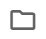

  をクリックし、ファイルメニューを開く。
1. マウントアイコンをクリックし Google Driveをマウントする。
1. drive の中の「MyDrive」が Google Drive のマイドライブとなる。

### Colabでファイルパスの取得
1. Driveメニューで目的のファイルにマウスを合わせ、ファイル名の右にある縦3つの「・」部分をクリックして「パスをコピー」を選択する。
1. プログラムコードの中で、ctrl+v でコピーされる。

# データをファイルから読み込む


データ分析でまず必要になる作業は、
データをファイルから読み込むことである。

今回はエクセルファイルを Python環境に読み込む。
これには、
Pandas モジュールの read_excel() 関数を使う。


なお、

    file_path = '/content/drive/MyDrive/データアップロード/customer_data.xlsx'

の部分は各自のファイル保管場所に合わせて変更する。


以下のコードセルを実行することで、
変数 file_path で指定したエクセルファイルのデータが
変数 data に格納される。




変数 data は、**データフレーム**と呼ばれる。


In [3]:
# Pandas モジュールのインポート
import pandas as pd
# 読み込むファイルを指定する
# ファイルパスは、シングルクオーテーションで囲む必要がある。
file_path = '/content/drive/MyDrive/データアップロード/customer_data.xlsx'

# ファイルのデータを data という変数に読み込む
data = pd.read_excel(file_path)

Pandas モジュールをインポートする際に、
```
import pandas as pd
```
と **pd** という省略名を付与たので

```
pd.read_excel(file_path)
```
としていることに注意する。

#データの構造把握

データフレームに読み込まれたデータの構造を把握する
ための方法について説明する。

## 項目の一覧

info() 関数を実行すると、
データの項目一覧が得られる。

In [4]:
#データの項目一覧の表示
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   顧客ID     500 non-null    int64  
 1   性別       497 non-null    object 
 2   年齢       496 non-null    float64
 3   職業       499 non-null    object 
 4   年収       500 non-null    int64  
 5   スマホの所有   500 non-null    object 
 6   スマホ利用時間  500 non-null    float64
 7   Aの利用回数   499 non-null    float64
 8   Bの利用回数   500 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 35.3+ KB


各項目の型は Dtype に示されている。
Dtype と型の関係性は以下のとおりである。

Dtype | 型
-- | --
datetime?? | 日付型
int??, float?? | 数値型
object | カテゴリ型


##データの定義 (各列の説明)

customer_data.xlsx は、
あるサービスに登録したユーザのデータである。
各項目の意味は以下の通りである。


列名 | 型 | 説明
--   | -- | --
顧客ID | 数値（整数） |
性別	 | カテゴリ型 |
年齢	 | 数値（整数）|
職業	 | カテゴリ型|
年収	 | 数値（整数）|
スマホの所有	| カテゴリ型 |
スマホ利用時間	| 数値（実数）| 1日の平均使用時間
Aの利用回数	|  数値（整数）| サービスＡの利用回数
Bの利用回数 |  数値（整数） | サービスＢの利用回数


## 行数と列数表示

データの行数と列数を調べるためには、shape を用いる。

In [5]:
data.shape

(500, 9)

data.shape は要素が2つあるタプルである。
最初の要素がレコード数、2番目の要素が項目数である。

もし、レコード数のみを得たいのであれば以下のようにすればよい。

In [6]:
data.shape[0]

500

## データを表示
head() を使うことで、
データの先頭から数行分を表示させることが可能である。


In [7]:
# データの最初の5行を表示する
pd.options.display.float_format = '{:.2f}'.format  # 小数点以下2桁で表示
data.head()

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
0,81336944,男性,NaN,会社員,393,はい,1.67,1.00,12
1,41990933,女性,51.00,NaN,450,はい,2.44,0.00,11
2,84494791,男性,45.00,会社員,497,はい,0.69,1.00,21
3,29406622,女性,27.00,公務員,313,はい,1.40,NaN,8
4,20205360,女性,61.00,会社員,292,はい,1.77,2.00,24


ここで、
NaNと表示されているのは数値が入力されいないことを意味しており、
 **欠損値**
あるいは
 **欠測値**
 と呼ぶ。


In [8]:
# 最後の 10 行を表示する
data.tail(10)

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
490,25956608,男性,44.00,その他,494,はい,3.20,6.00,17
491,96742004,男性,13.00,学生,0,はい,0.96,9.00,16
492,10997852,男性,42.00,公務員,707,はい,1.22,2.00,15
493,65116230,男性,32.00,会社員,438,はい,1.10,2.00,13
494,37706329,男性,25.00,公務員,259,はい,1.47,12.00,13
495,45099496,男性,45.00,公務員,411,はい,2.94,6.00,19
496,30507179,男性,18.00,学生,215,はい,2.01,12.00,8
497,30507179,男性,18.00,学生,215,はい,2.01,12.00,8
498,59997136,男性,65.00,公務員,556,いいえ,0.00,2.00,12
499,99854703,NaN,26.00,会社員,290,はい,1.28,9.00,18


# 基本的な統計量の表示

describe() を使うことで基本的な統計量を確認できる。

数値型の項目に対しては以下の数値を確認することができる。
* データ個数
* 平均（mean）
* 標準偏差
* 最小値
* 第一四分位数（25%）：小さい方から25％の値
* 第二四分位数（50%）：小さい方から50％の値
* 第三四分位数（75%）：小さい方から75％の値
* 最大値


In [9]:
# describe() では、数値型の項目だけが表示される
pd.options.display.float_format = '{:.2f}'.format  # 小数点以下2桁で表示
data.describe()

,顧客ID,年齢,年収,スマホ利用時間,Aの利用回数,Bの利用回数
count,500.00,496.00,500.00,500.00,499.00,500.00
mean,54302909.73,38.89,428.38,1.57,4.86,14.86
std,25439201.65,17.80,251.78,0.96,3.84,4.61
min,10180519.00,10.00,0.00,0.00,0.00,4.00
25%,32626207.00,23.00,243.75,1.07,2.00,12.00
50%,52393069.50,39.00,418.00,1.53,4.00,15.00
75%,77753828.00,52.25,605.25,2.07,7.00,18.00
max,99854703.00,130.00,1304.00,6.87,20.00,31.00


### 四分位数

小さい方から25%（四分の一）のデータを第一四分位と呼ぶ。
特に、**第二四分位は中央値**とも呼ばれる。

* 例：以下の9個数字の中央値(median)は、小さい方から5番目であり、20である。

   1, 2, 5, 10, **20**, 49, 100, 200, 210

ちなみに、平均（mean）は約 66.3 である。

この例のように、極端に大きな（小さな）データが含まれる場合には、
平均と中央値が大きく異なるため、
平均は全体を代表する統計量として適切でないこともありうる。


また、カテゴリ型のデータに対しては、以下の数値が確認できる
* NULLでないレコード数数
* ユニーク数（カテゴリ値の個数）
* 最頻値
* 最頻値のレコード数

カテゴリ型の項目に対しては、以下のように describe を使う必要がある。

In [10]:
# カテゴリ型の項目に対しては、以下のように describe を使う。異なる値の数と最頻値が算出される。
data.describe(include='object')

,性別,職業,スマホの所有
count,497,499,500
unique,2,4,2
top,男性,その他,はい
freq,350,152,434


# データクレンジング
代表的なデータクレンジングとして、以下の3つを扱う

*   欠損値の処理
*   異常値の削除
*   重複レコードの削除



## 欠損値の処理

以下の方法で、列毎に欠損値の個数が集計できる。

In [11]:
# 欠損値の個数を調べる
# data という変数に読み込む
data = pd.read_excel(file_path)
data.isnull().sum()

,0
顧客ID,0
性別,3
年齢,4
職業,1
年収,0
スマホの所有,0
スマホ利用時間,0
Aの利用回数,1
Bの利用回数,0


## NULLのレコードを削除する

もっとも単純な欠損値の処理は、
欠損値を含むレコードを削除することである。これには、

```
dropna()
```
を用いる。

In [12]:
# data という変数に読み込む
data = pd.read_excel(file_path)
# print( data.isnull().sum() )
data = data.dropna()
data.isnull().sum()

,0
顧客ID,0
性別,0
年齢,0
職業,0
年収,0
スマホの所有,0
スマホ利用時間,0
Aの利用回数,0
Bの利用回数,0


In [13]:
# data の性別と職業がNULLのレコードを削除する

# data という変数に読み込む
data = pd.read_excel(file_path)

data = data.dropna(subset=['性別', '職業'])
data.isnull().sum()

,0
顧客ID,0
性別,0
年齢,4
職業,0
年収,0
スマホの所有,0
スマホ利用時間,0
Aの利用回数,1
Bの利用回数,0


### 数値で置き換える場合

    fillna()

を使うことで、欠損値部分を指定したデータで置き換えることができる。


In [14]:
data = pd.read_excel(file_path)

# 年収の欠損値を0で補完
data['年収'] = data['年収'].fillna(0)

# スマホ利用時間の欠損値を平均値で補完
m = data['スマホ利用時間'].mean()
data['スマホ利用時間'] = data['スマホ利用時間'].fillna(m)

## 異常値の削除

全体の分布から大きく外れた数値を異常値（あるいは外れ値）と呼ぶ。

数値型の列の場合、
異常値の考え方の主なものは以下の2つである。

*  平均から標準偏差の3倍以上離れたもの
*  四分位範囲（第三四分位と第一四分位の差）を用いたもの
  *  第三四分位＋「四分位範囲」×1.5 より大
  *  第一四分位－「四分位範囲」×1.5 より小

カテゴリ型の場合には、レコード数が極端に少ないカテゴリを
異常値と考え、「その他」として集約することが行われる場合がある。

In [15]:
#年齢が、平均値から標準偏差の3倍以上離れているレコードを抽出する

# data という変数に読み込む
data = pd.read_excel(file_path)

# 年齢の平均値と標準偏差を計算
age_mean = data['年齢'].mean()
age_std = data['年齢'].std()

# 平均値から標準偏差の3倍以上離れているレコードのインデックス（レコード）を取り出す
indices_to_drop = data[(data['年齢'] < age_mean - 3 * age_std) | (data['年齢'] > age_mean + 3 * age_std)].index

data_dropped = data.drop(indices_to_drop)

# 確認する
data_dropped['年齢'].max()

65.0

In [16]:
# data という変数に読み込む
data = pd.read_excel(file_path)

# data を更新する場合には以下のように inplace=True と指定して実行する
data.drop(indices_to_drop, inplace=True)

In [17]:
# 確認する
data['年齢'].max()

65.0

## 重複レコードの削除

In [18]:
# 重複した行が存在していることも確認する

# もう一度データを読み込みなおす
data = pd.read_excel(file_path)
data.tail()

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
495,45099496,男性,45.00,公務員,411,はい,2.94,6.00,19
496,30507179,男性,18.00,学生,215,はい,2.01,12.00,8
497,30507179,男性,18.00,学生,215,はい,2.01,12.00,8
498,59997136,男性,65.00,公務員,556,いいえ,0.00,2.00,12
499,99854703,NaN,26.00,会社員,290,はい,1.28,9.00,18


In [19]:
# 重複した行を削除する
data.drop_duplicates(inplace=True)
data.tail()

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
494,37706329,男性,25.00,公務員,259,はい,1.47,12.00,13
495,45099496,男性,45.00,公務員,411,はい,2.94,6.00,19
496,30507179,男性,18.00,学生,215,はい,2.01,12.00,8
498,59997136,男性,65.00,公務員,556,いいえ,0.00,2.00,12
499,99854703,NaN,26.00,会社員,290,はい,1.28,9.00,18


# 主なDataFrame の操作

In [20]:
# 再度データを変数 data に読み込む
data = pd.read_excel(file_path)
# NULL を含むレコードを削除する
data = data.dropna()

## 並べ替え（ソート）

In [21]:
# 年齢の小さい順に並べる（昇順（ascending:アセンディング）とも呼ぶ）
# 並べ替えの対象となる列名を指定する。
# シングルクオーテーション(')が必要。
data.sort_values('年齢')

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
266,79332527,男性,10.00,学生,0,いいえ,0.00,5.00,20
482,15287384,男性,10.00,学生,0,いいえ,0.00,10.00,16
308,48345111,女性,10.00,学生,0,いいえ,0.00,3.00,10
418,38473584,女性,10.00,学生,0,いいえ,0.00,5.00,10
195,13596379,男性,10.00,学生,0,いいえ,0.00,12.00,11
...,...,...,...,...,...,...,...,...,...
41,42510662,男性,65.00,公務員,548,はい,1.39,2.00,11
498,59997136,男性,65.00,公務員,556,いいえ,0.00,2.00,12
178,52400051,男性,130.00,会社員,457,はい,1.76,2.00,8
98,28123070,男性,130.00,会社員,613,はい,2.05,3.00,15


In [22]:
# 大きい順に並べる（降順と呼ぶ）場合は、ascending=False を追加する。
data.sort_values('年齢', ascending=False)

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
260,31453537,男性,130.00,会社員,662,はい,3.22,5.00,20
178,52400051,男性,130.00,会社員,457,はい,1.76,2.00,8
98,28123070,男性,130.00,会社員,613,はい,2.05,3.00,15
498,59997136,男性,65.00,公務員,556,いいえ,0.00,2.00,12
115,87310579,男性,65.00,会社員,433,はい,1.39,3.00,9
...,...,...,...,...,...,...,...,...,...
482,15287384,男性,10.00,学生,0,いいえ,0.00,10.00,16
195,13596379,男性,10.00,学生,0,いいえ,0.00,12.00,11
266,79332527,男性,10.00,学生,0,いいえ,0.00,5.00,20
308,48345111,女性,10.00,学生,0,いいえ,0.00,3.00,10


In [23]:
# by = '列名' としてもよい
data.sort_values(by = '年齢', ascending=False)

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
260,31453537,男性,130.00,会社員,662,はい,3.22,5.00,20
178,52400051,男性,130.00,会社員,457,はい,1.76,2.00,8
98,28123070,男性,130.00,会社員,613,はい,2.05,3.00,15
498,59997136,男性,65.00,公務員,556,いいえ,0.00,2.00,12
115,87310579,男性,65.00,会社員,433,はい,1.39,3.00,9
...,...,...,...,...,...,...,...,...,...
482,15287384,男性,10.00,学生,0,いいえ,0.00,10.00,16
195,13596379,男性,10.00,学生,0,いいえ,0.00,12.00,11
266,79332527,男性,10.00,学生,0,いいえ,0.00,5.00,20
308,48345111,女性,10.00,学生,0,いいえ,0.00,3.00,10


In [24]:
# 並べ替え、先頭の10行を表示する場合
data.sort_values('年齢', ascending=False).head(10)

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
260,31453537,男性,130.00,会社員,662,はい,3.22,5.00,20
178,52400051,男性,130.00,会社員,457,はい,1.76,2.00,8
98,28123070,男性,130.00,会社員,613,はい,2.05,3.00,15
498,59997136,男性,65.00,公務員,556,いいえ,0.00,2.00,12
115,87310579,男性,65.00,会社員,433,はい,1.39,3.00,9
310,18733313,男性,65.00,その他,974,はい,1.81,1.00,10
41,42510662,男性,65.00,公務員,548,はい,1.39,2.00,11
317,40801597,女性,65.00,公務員,801,はい,0.72,3.00,23
174,17196772,男性,65.00,その他,1238,はい,1.51,2.00,25
282,37981616,男性,65.00,その他,736,はい,1.52,1.00,16


In [25]:
# 同じ大きさのデータの場合に、さらに別項目でソートを行うことができる
# まず、年齢で並べ、同じ年齢の場合は、顧客IDで並べる場合。
data.sort_values(['年齢','顧客ID'],).head(10)

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
195,13596379,男性,10.00,学生,0,いいえ,0.00,12.00,11
482,15287384,男性,10.00,学生,0,いいえ,0.00,10.00,16
418,38473584,女性,10.00,学生,0,いいえ,0.00,5.00,10
308,48345111,女性,10.00,学生,0,いいえ,0.00,3.00,10
266,79332527,男性,10.00,学生,0,いいえ,0.00,5.00,20
338,10180519,男性,11.00,学生,0,いいえ,0.00,10.00,14
177,23544817,女性,11.00,学生,0,いいえ,0.00,3.00,13
303,50985696,男性,11.00,学生,0,いいえ,0.00,8.00,11
110,91981647,男性,11.00,学生,0,いいえ,0.00,6.00,16
215,96586237,男性,11.00,学生,0,いいえ,0.00,7.00,22


In [26]:
# まず、年齢で並べ、同じ年齢の場合は、顧客IDで並べる場合。
# ただし、年齢は大きなものから並べ、年齢が同じ場合は顧客IDの小さなものから並べる場合は、以下のように行う
data.sort_values(['年齢','顧客ID'], ascending=[False, True]).head(10)

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
98,28123070,男性,130.00,会社員,613,はい,2.05,3.00,15
260,31453537,男性,130.00,会社員,662,はい,3.22,5.00,20
178,52400051,男性,130.00,会社員,457,はい,1.76,2.00,8
174,17196772,男性,65.00,その他,1238,はい,1.51,2.00,25
310,18733313,男性,65.00,その他,974,はい,1.81,1.00,10
220,24025262,男性,65.00,その他,978,はい,0.94,5.00,22
487,27325230,男性,65.00,公務員,694,はい,2.84,4.00,13
282,37981616,男性,65.00,その他,736,はい,1.52,1.00,16
317,40801597,女性,65.00,公務員,801,はい,0.72,3.00,23
41,42510662,男性,65.00,公務員,548,はい,1.39,2.00,11


## 行の選択

### 行数で選択する

In [27]:
# 20行目から21行目までを表示。列は全て選ばれる。
data[20:22]

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
23,61237412,男性,62.00,その他,585,はい,1.81,3.00,13
24,20351867,男性,61.00,その他,698,はい,1.49,1.00,15


### 条件式で選択する

In [28]:
# 年齢が30未満の行を選択
data[ data['年齢'] < 30]

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
6,46119309,女性,12.00,学生,0,いいえ,0.00,4.00,8
7,81075284,男性,12.00,学生,0,いいえ,0.00,11.00,13
8,39537381,男性,16.00,その他,214,はい,1.14,13.00,19
10,43541904,男性,27.00,公務員,413,はい,2.17,14.00,15
11,13058388,男性,27.00,その他,323,はい,1.90,14.00,18
...,...,...,...,...,...,...,...,...,...
486,72565433,男性,23.00,その他,241,はい,1.44,20.00,11
491,96742004,男性,13.00,学生,0,はい,0.96,9.00,16
494,37706329,男性,25.00,公務員,259,はい,1.47,12.00,13
496,30507179,男性,18.00,学生,215,はい,2.01,12.00,8


In [29]:
data[ data['職業']=='会社員']

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
2,84494791,男性,45.00,会社員,497,はい,0.69,1.00,21
4,20205360,女性,61.00,会社員,292,はい,1.77,2.00,24
12,78990911,女性,22.00,会社員,184,はい,1.21,4.00,5
14,10309848,女性,62.00,会社員,590,はい,2.16,7.00,31
21,28562744,男性,45.00,会社員,664,はい,1.01,3.00,12
...,...,...,...,...,...,...,...,...,...
477,52621193,男性,62.00,会社員,762,はい,0.87,2.00,18
481,46832034,男性,44.00,会社員,721,はい,0.83,3.00,12
488,44064606,男性,57.00,会社員,548,いいえ,0.00,5.00,7
489,70847018,男性,65.00,会社員,887,はい,1.56,1.00,15


In [30]:
data[ data['職業']=='会社員'].head(3)

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
2,84494791,男性,45.00,会社員,497,はい,0.69,1.00,21
4,20205360,女性,61.00,会社員,292,はい,1.77,2.00,24
12,78990911,女性,22.00,会社員,184,はい,1.21,4.00,5


In [31]:
# 年齢が50歳より大きいレコード
data[(data['年齢'] > 50) ].head()

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
4,20205360,女性,61.00,会社員,292,はい,1.77,2.00,24
9,41429479,男性,59.00,公務員,935,いいえ,0.00,3.00,13
14,10309848,女性,62.00,会社員,590,はい,2.16,7.00,31
15,44622311,男性,54.00,公務員,668,はい,1.53,0.00,9
17,56070780,男性,58.00,公務員,725,はい,1.32,7.00,14


In [32]:
# 複数の条件式を組合わせることも可能
# OR 条件で組み合わせた例
data[(data['年齢'] < 11) | (data['年齢'] > 60)].head()

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
4,20205360,女性,61.00,会社員,292,はい,1.77,2.00,24
14,10309848,女性,62.00,会社員,590,はい,2.16,7.00,31
23,61237412,男性,62.00,その他,585,はい,1.81,3.00,13
24,20351867,男性,61.00,その他,698,はい,1.49,1.00,15
27,66479513,男性,64.00,公務員,853,はい,1.57,4.00,18


## 列の選択

列名を指定することで、列の選択が可能である。

In [33]:
selected_data = data[['顧客ID', '性別', '年齢']]

In [34]:
selected_data.head()

,顧客ID,性別,年齢
2,84494791,男性,45.00
4,20205360,女性,61.00
5,55928989,男性,39.00
6,46119309,女性,12.00
7,81075284,男性,12.00


## 列名の変更

In [35]:
# 列名を変更したいのであれば、以下のように行う
data.rename(columns={'年収': '収入'})

,顧客ID,性別,年齢,職業,収入,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
2,84494791,男性,45.00,会社員,497,はい,0.69,1.00,21
4,20205360,女性,61.00,会社員,292,はい,1.77,2.00,24
5,55928989,男性,39.00,公務員,317,はい,1.60,1.00,11
6,46119309,女性,12.00,学生,0,いいえ,0.00,4.00,8
7,81075284,男性,12.00,学生,0,いいえ,0.00,11.00,13
...,...,...,...,...,...,...,...,...,...
494,37706329,男性,25.00,公務員,259,はい,1.47,12.00,13
495,45099496,男性,45.00,公務員,411,はい,2.94,6.00,19
496,30507179,男性,18.00,学生,215,はい,2.01,12.00,8
497,30507179,男性,18.00,学生,215,はい,2.01,12.00,8


# 基礎集計


In [36]:
# 再度データを変数 data に読み込む
data = pd.read_excel(file_path)
# NULL を含むレコードを削除する
data = data.dropna()

## 基本的な統計量の算出

In [37]:
# 特定の列の平均
data['スマホ利用時間'].mean()

1.565274949083503

data['スマホ利用時間'].mean() の mean()の部分は以下の関数に変更ができる

関数 | 意味
--   | --
mean() | 平均
median() | 中央値
min() | 最小値
max()	| 最大値
std() | 標準偏差
var() | 分散
quantile(0.25)	| 第一四分位（25%）
quantile(0.75)	| 第三四分位（75%）
nunique() | カテゴリ型の値の個数  
unique()  | カテゴリ型の値を表示する


##カウント

In [38]:
# 再度データを変数 data に読み込む
data = pd.read_excel(file_path)

In [39]:
# カテゴリ型の項目に対して、値の種類を調べる
data['職業'].unique()

array(['会社員', nan, '公務員', '学生', 'その他'], dtype=object)

In [40]:
# 値毎のレコード件数を表示させる。
# 欠損値が含まれないので注意
data['職業'].value_counts()

# 他の列も確認する場合
# data['性別'].value_counts()
# data['スマホの所有'].value_counts()

,count
職業,
その他,152
会社員,141
公務員,136
学生,70


In [41]:
# 欠損値も含める場合
data['職業'].value_counts(dropna=False)

,count
職業,
その他,152
会社員,141
公務員,136
学生,70
NaN,1


以下のように、結果を並び替えを行い表示すると見やすくなる。

In [42]:
data['職業'].value_counts(dropna=False).sort_values(ascending=False)
# data['職業'].value_counts().sort_values()
# data['職業'].value_counts().sort_values(ascending=False).head()

,count
職業,
その他,152
会社員,141
公務員,136
学生,70
NaN,1


normalize=True を指定して、相対値にすることができる。

In [43]:
data['職業'].value_counts( normalize=True )

,proportion
職業,
その他,0.30
会社員,0.28
公務員,0.27
学生,0.14


## 最頻値
カテゴリ型のデータでもっとも多く出現しているものを**最頻値**と呼ぶ。
職業であれば「その他」が最頻値となる。

In [44]:
data['職業'].mode()

,職業
0,その他


なお、最頻値が複数ある場合は、全ての最頻値が表示される。


### 複数の最頻値を持つ場合

In [45]:
# 最頻値が複数ある場合の例
# サンプルデータを作成
df = pd.DataFrame({
    'A': ['a', 'b', 'b', 'c', 'd', 'c']
})
df.head(6)

,A
0,a
1,b
2,b
3,c
4,d
5,c


In [46]:
# mode を計算
df['A'].mode()

,A
0,b
1,c


上のデータでは、最頻値が2つあり b, c 両方が最頻値である。
このような場合は、最頻値が２つ表示される

In [47]:
data_renamed = data.rename(columns={'Aの利用回数': 'A回数','Bの利用回数': 'B回数'})
data_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   顧客ID     500 non-null    int64  
 1   性別       497 non-null    object 
 2   年齢       496 non-null    float64
 3   職業       499 non-null    object 
 4   年収       500 non-null    int64  
 5   スマホの所有   500 non-null    object 
 6   スマホ利用時間  500 non-null    float64
 7   A回数      499 non-null    float64
 8   B回数      500 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 35.3+ KB


## 行を選択して集計する

In [48]:
# 再度データを変数 data に読み込む
data = pd.read_excel(file_path)
# NULL を含むレコードを削除する
data = data.dropna()

In [49]:
# 年齢が50歳以上の顧客の年収の平均を求める
data[ data['年齢'] >= 50]['年収'].mean()

636.0127388535032

In [50]:
# 選択した部分をいったん別の変数に代入したやり方でも良い
data_young = data[ data['年齢'] > 50]
data_young['年収'].mean()

644.7123287671233

In [51]:
data[ data['職業']=='会社員']['スマホ利用時間'].median()

1.53

In [52]:
data[ data['職業']=='会社員']['スマホ利用時間'].mean()

1.711726618705036

In [53]:
# 複数条件をANDする
data[ (data['性別'] == '女性') & (data['年収'] >= 400) ]['年齢'].mean()

52.083333333333336

In [54]:
# 複数条件をORする
data[ (data['職業'] == '会社員') | (data['職業'] == '公務員') ]['年収'].mean()

496.2888888888889

##インデックスを指定して削除（異常値の削除）

    drop( 削除するインデック )

を使うことで指定したレコードを削除できる。


In [55]:
#年齢が、平均値から標準偏差の3倍以上離れているレコードを抽出する

# 再度データを変数 data に読み込む
data = pd.read_excel(file_path)

# 年齢の平均値と標準偏差を計算
age_mean = data['年齢'].mean()
age_std = data['年齢'].std()

# 平均値から標準偏差の3倍以上離れているレコードのインデックス（レコード）を取り出す
indices_to_drop = data[(data['年齢'] < age_mean - 3 * age_std) | (data['年齢'] > age_mean + 3 * age_std)].index

data_dropped = data.drop(indices_to_drop)

# 確認する
data_dropped['年齢'].max()

65.0

In [56]:
# data を更新する場合には以下のように inplace=True と指定して実行する
data.drop(indices_to_drop, inplace=True)

In [57]:
# 確認する
data['年齢'].max()

65.0

# 複雑な集計

分類して集計することができる。

例えば、性別で分類して年齢の平均を求める、といったことが可能である。


以下の3項目を指定する必要がある。

*   分類項目：カテゴリ属性から選択する
*   集計項目：数値属性
*   集計方法：集計方法には、平均(mean)、中央値(median)、最小(min)、最大(max)が使える。

例えば、性別で分類して年齢を平均する場合には、

*   分類項目 → 性別
*   集計項目 → 年齢
*   集計方法 → 平均

とする。

In [58]:
# 再度データを変数 data に読み込む
data = pd.read_excel(file_path)
# NULL を含むレコードを削除する
data = data.dropna()

In [59]:
# 性別で分類して年齢の平均を求める。
data.groupby('性別')['年齢'].mean()

,年齢
性別,
女性,39.31
男性,38.77


In [60]:
# 集計の結果を別のデータフレーム（変数名は new_data ）にする場合は、reset_index() を最後に着ける
new_data = data.groupby('性別')['年齢'].mean().reset_index()
new_data

,性別,年齢
0,女性,39.31
1,男性,38.77


In [61]:
selected_data = data[['性別', '年齢', '年収', 'Aの利用回数', 'Bの利用回数']]

# 性別ごとに全ての項目の平均を計算することも可能
selected_data.groupby('性別').mean()


,年齢,年収,Aの利用回数,Bの利用回数
性別,,,,
女性,39.31,364.02,3.03,14.74
男性,38.77,455.98,5.66,14.96


In [62]:
selected_data = data[['性別', '職業', '年齢', '年収', 'Aの利用回数', 'Bの利用回数']]
selected_data.groupby('性別').median()
# 職業の項目は数値型ではないので、中央値を求めることができずエラーメッセージが表示される。

TypeError: agg function failed [how->median,dtype->object]

In [63]:
# 数値型の列に限って集計を行う
selected_data = data[['性別', '年齢', '年収', 'Aの利用回数', 'Bの利用回数']]
selected_data.groupby('性別').median()

,年齢,年収,Aの利用回数,Bの利用回数
性別,,,,
女性,41.00,330.00,3.00,14.00
男性,39.00,449.50,4.00,15.00


2つ以上の属性を組み合わせて分類して、集計することもできる。

In [64]:
selected_data = data[['性別', '職業', '年齢', '年収', 'Aの利用回数', 'Bの利用回数']]
selected_data.groupby(['性別','職業']).mean()

年齢     年収  Aの利用回数  Bの利用回数
性別 職業                              
女性 その他 38.63 383.80    2.69   14.39
   会社員 44.65 415.85    3.33   15.52
   公務員 42.46 378.86    2.91   15.71
   学生  14.62  63.08    3.62   10.77
男性 その他 38.85 494.67    5.94   15.71
   会社員 47.46 547.85    4.20   14.74
   公務員 43.88 527.70    4.27   14.72
   学生  15.82 117.42    9.88   14.39

集計方法も複数指定が可能である。最小値、最大値、平均を計算する方法は以下の通り

In [65]:
data.groupby(['性別','職業'])['年齢'].agg(['min', 'max', 'mean'])

min    max  mean
性別 職業                    
女性 その他 14.00  64.00 38.63
   会社員 19.00  64.00 44.65
   公務員 19.00  65.00 42.46
   学生  10.00  22.00 14.62
男性 その他 14.00  65.00 38.85
   会社員 20.00 130.00 47.46
   公務員 19.00  65.00 43.88
   学生  10.00  24.00 15.82

集計結果をデータフレームに変換するためには
 reset_index()
 を使うとよい。

In [67]:
#結果をデータフレームに格納する
df = data.groupby(['性別','職業'])['年齢'].agg(['min', 'max', 'mean']).reset_index()
df

,性別,職業,min,max,mean
0,女性,その他,14.00,64.00,38.63
1,女性,会社員,19.00,64.00,44.65
2,女性,公務員,19.00,65.00,42.46
3,女性,学生,10.00,22.00,14.62
4,男性,その他,14.00,65.00,38.85
5,男性,会社員,20.00,130.00,47.46
6,男性,公務員,19.00,65.00,43.88
7,男性,学生,10.00,24.00,15.82


列名を変更して分かり易いデータフレームとするこもとできる。

In [68]:
df = df.rename(columns={'min': '年齢最小', 'max':'年齢最大', 'mean':'年齢平均'})
df

,性別,職業,年齢最小,年齢最大,年齢平均
0,女性,その他,14.00,64.00,38.63
1,女性,会社員,19.00,64.00,44.65
2,女性,公務員,19.00,65.00,42.46
3,女性,学生,10.00,22.00,14.62
4,男性,その他,14.00,65.00,38.85
5,男性,会社員,20.00,130.00,47.46
6,男性,公務員,19.00,65.00,43.88
7,男性,学生,10.00,24.00,15.82


# 信頼区間

収集されたデータから計算された平均は、
必ずしも母集団の平均と等しいとは限らない。
観測には誤差が含まれる。
そこで、真の値と比べてどの程度確からしいのかを示す指標に
**信頼区間**がある。

信頼区間とは、**ある確率**で真の値を含む範囲のことである。
確率としては0.95 (95%) が良く用いられる。
この確率を**信頼水準**と呼び、
信頼水準が95%の信頼区間を
**95%信頼区間**とよぶことがある。
まお、
確率を1に近づけるほど信頼区間は広く、
逆に確率を下げれば信頼区間は狭くなる。

平均値の信頼区間の下限と上限の計算には、
scipy の stats パッケージの t.interval を用い、
以下のようにすればよい。

```
import scipy.stats as st
lower_bound, upper_bound = st.t.interval(信頼水準, df=データの個数 - 1, loc=平均, scale=標準誤差)

```
変数 lower_bound と upper_bound に、
信頼区間の下限と上限が格納される。

ここで、
標準誤差とは平均の標準偏差のことで、
データの標準偏差をデータ数の平方根で割った値である。
stats パッケージをインポートし、
stats.sem で計算できる。



In [69]:
import numpy as np
import scipy.stats as st

# 信頼水準を設定
confidence = 0.95
# 信頼区間を求めたいデータを変数「_data」にセットする。
_data = data['年収']

# 標本平均と標準誤差を計算
mean = _data.mean()
sem = st.sem(_data)

# 信頼区間の導出
# scipy.stats.t.interval 関数を使用して、信頼区間を求める。
lower_bound, upper_bound = st.t.interval(confidence, df=_data.shape[0] - 1, loc=mean, scale=sem)

# 信頼区間を表示
print(f"信頼区間: ({lower_bound:.2f}, {upper_bound:.2f})")


信頼区間: (406.37, 451.28)


# 参考

### 行や列の限定

iloc を使い、DataFrame に格納された表の一部だけを取り出すことが可能。

基本的な使い方は、

> iloc[ 行の範囲を指定, 列の範囲を指定 ]

In [70]:
# 0行目から2行目まで、2列目から4列目まで
data.iloc[0:3,2:5]

,年齢,職業,年収
2,45.00,会社員,497
4,61.00,会社員,292
5,39.00,公務員,317


In [71]:
# 0行目から2行目まで
data.iloc[0:3,:]

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
2,84494791,男性,45.00,会社員,497,はい,0.69,1.00,21
4,20205360,女性,61.00,会社員,292,はい,1.77,2.00,24
5,55928989,男性,39.00,公務員,317,はい,1.60,1.00,11


In [72]:
# 1列目から最後まで
data.iloc[1:3,1:]

,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
4,女性,61.00,会社員,292,はい,1.77,2.00,24
5,男性,39.00,公務員,317,はい,1.60,1.00,11


In [73]:
# 1列目から最後の1つ前まで
data.iloc[1:3,:-1]

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数
4,20205360,女性,61.00,会社員,292,はい,1.77,2.00
5,55928989,男性,39.00,公務員,317,はい,1.60,1.00


### 行番号と列番号による指定

> iloc[ 行のリスト, 列のリスト ]

In [74]:
data.iloc[[100,1,102],[0,2,3]]

,顧客ID,年齢,職業
103,49411283,23.00,学生
4,20205360,61.00,会社員
105,73215458,41.00,公務員


In [75]:
# 行番号や列番号を省略すると全て選択される
data.iloc[[100,1,102],]

,顧客ID,性別,年齢,職業,年収,スマホの所有,スマホ利用時間,Aの利用回数,Bの利用回数
103,49411283,男性,23.00,学生,237,はい,2.07,14.00,14
4,20205360,女性,61.00,会社員,292,はい,1.77,2.00,24
105,73215458,女性,41.00,公務員,586,はい,0.83,1.00,15
